In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [3]:
# Run this cell to connect to your Drive folder

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9',
                                    dest_path='/content/diagnosis.csv',
                                    unzip=False)

In [4]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('/content/diagnosis.csv')
dataset = pd_dat.values

In [5]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [7]:
# Build the input layers

from tensorflow.keras import layers, Input
from tensorflow.keras import Model
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model


input_shape= (1, )

temperature = Input(shape=input_shape, name="temperature")
nausea_occurence = Input(shape=input_shape, name="nausea")
lumbar_pain = Input(shape=input_shape, name="lumbar_pain")
urine_pushing = Input(shape=input_shape, name="urine_pushing")
micturition_pains = Input(shape=input_shape, name="micturition_pains")
bis = Input(shape=input_shape, name="urethra_burning")

In [8]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [9]:
# Merge all input features into a single large vector

x = layers.Concatenate()(list_inputs)

In [10]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(units=1, activation="sigmoid", name="inflam")(x)
nephritis_pred = layers.Dense(units=1, activation="sigmoid", name="nephr")(x)

In [11]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [12]:
# Create the model object

model = Model(inputs = list_inputs,
              outputs = list_outputs)

#### Plot the model

In [13]:
# Display the multiple input/output model

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
temperature (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
nausea (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
lumbar_pain (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
urine_pushing (InputLayer)      [(None, 1)]          0                                            
_______________________________________________________________________________________

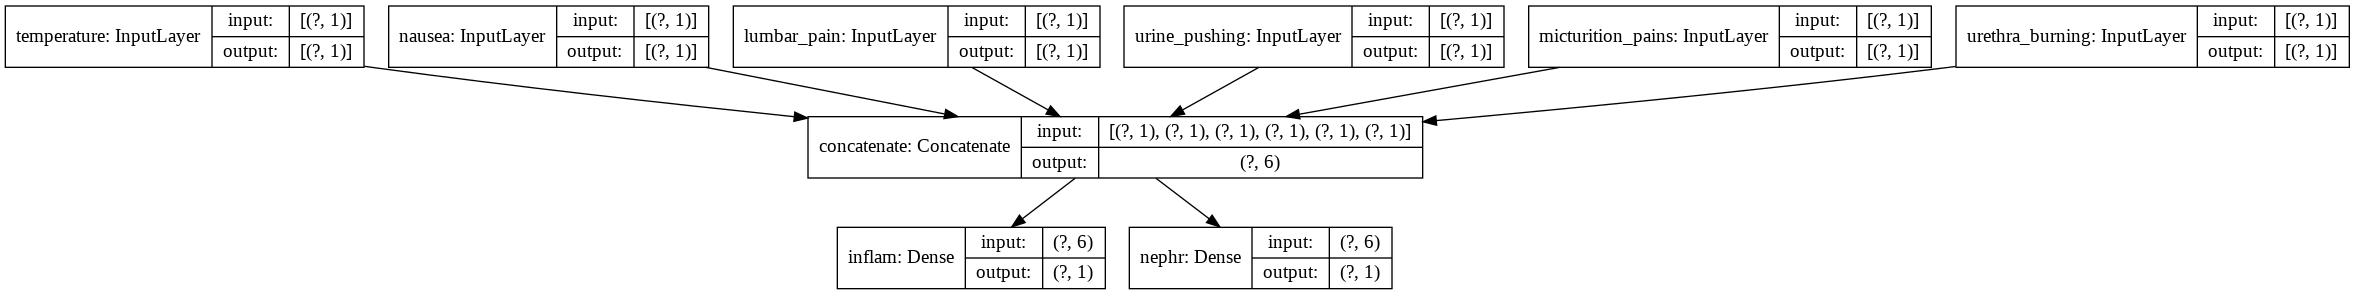

In [14]:
tf.keras.utils.plot_model(
    model = model, to_file='model.png', 
    show_shapes=True, 
    show_layer_names=True,
    rankdir='TB', 
    expand_nested=False, 
    dpi=96
)

#### Compile the model

In [15]:
# Compile the model

model.compile(optimizer="adam", 
              loss={"inflam": "binary_crossentropy", "nephr": "binary_crossentropy"}, 
              loss_weights = [1., 1.],
              metrics=["acc", metrics.Precision(name="pre"), metrics.Recall(name="rec")])

#### Fit the model 

In [16]:
# Define training inputs and outputs

inputs_train = {'temperature': temp_train, 
                'nausea': nocc_train, 
                'lumbar_pain': lumbp_train,
                'urine_pushing': up_train, 
                'micturition_pains': mict_train, 
                'urethra_burning': bis_train}

outputs_train = {'inflam': inflam_train, 
                 'nephr': nephr_train}

In [17]:
# Train the model

history = model.fit(x = inputs_train, y = outputs_train, 
                    batch_size=100, 
                    epochs=1000, 
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 18.1816 - inflam_loss: 16.8153 - nephr_loss: 1.3663 - inflam_acc: 0.4750 - inflam_pre: 0.4750 - inflam_rec: 1.0000 - nephr_acc: 0.4375 - nephr_pre: 0.4375 - nephr_rec: 1.0000
Epoch 2/1000
1/1 - 0s - loss: 18.1434 - inflam_loss: 16.7933 - nephr_loss: 1.3501 - inflam_acc: 0.4750 - inflam_pre: 0.4750 - inflam_rec: 1.0000 - nephr_acc: 0.4375 - nephr_pre: 0.4375 - nephr_rec: 1.0000
Epoch 3/1000
1/1 - 0s - loss: 18.1055 - inflam_loss: 16.7713 - nephr_loss: 1.3342 - inflam_acc: 0.4750 - inflam_pre: 0.4750 - inflam_rec: 1.0000 - nephr_acc: 0.4375 - nephr_pre: 0.4375 - nephr_rec: 1.0000
Epoch 4/1000
1/1 - 0s - loss: 18.0677 - inflam_loss: 16.7493 - nephr_loss: 1.3185 - inflam_acc: 0.4750 - inflam_pre: 0.4750 - inflam_rec: 1.0000 - nephr_acc: 0.4375 - nephr_pre: 0.4375 - nephr_rec: 1.0000
Epoch 5/1000
1/1 - 0s - loss: 18.0303 - inflam_loss: 16.7272 - nephr_loss: 1.3030 - inflam_acc: 0.4750 - inflam_pre: 0.4750 - inflam_rec: 1.0000 - nephr_acc: 0.4375 - nephr_pre: 0.

#### Plot the learning curves

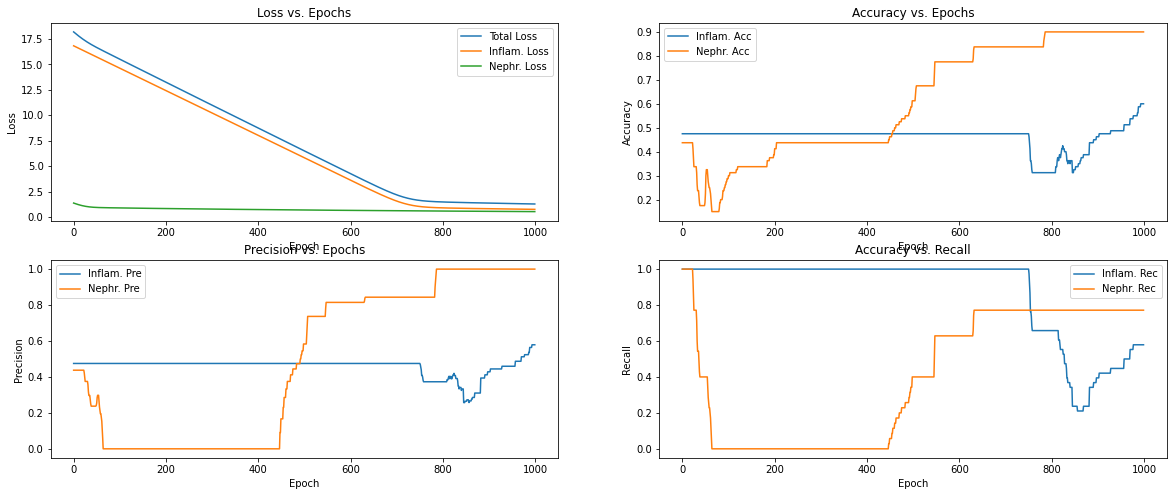

In [18]:
# Plot the training accuracy
plt.rcParams["figure.figsize"] = 20, 8

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')]
pre_keys = [k for k in history.history.keys() if k in ('inflam_pre', 'nephr_pre')]
rec_keys = [k for k in history.history.keys() if k in ('inflam_rec', 'nephr_rec')] 
loss_keys = [k for k in history.history.keys() if k in ('loss', 'inflam_loss', 'nephr_loss')]

plt.subplot(2, 2, 1)
plt.plot(history.history[loss_keys[0]], label="Total Loss")
plt.plot(history.history[loss_keys[1]], label="Inflam. Loss")
plt.plot(history.history[loss_keys[2]], label="Nephr. Loss")
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history[acc_keys[0]], label="Inflam. Acc")
plt.plot(history.history[acc_keys[1]], label="Nephr. Acc")
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history.history[pre_keys[0]], label="Inflam. Pre")
plt.plot(history.history[pre_keys[1]], label="Nephr. Pre")
plt.title('Precision vs. Epochs')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history.history[rec_keys[0]], label="Inflam. Rec")
plt.plot(history.history[rec_keys[1]], label="Nephr. Rec")
plt.title('Accuracy vs. Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [19]:
# Evaluate the model

inputs_test = {'temperature': temp_test, 
                'nausea': nocc_test, 
                'lumbar_pain': lumbp_test,
                'urine_pushing': up_test, 
                'micturition_pains': mict_test, 
                'urethra_burning': bis_test}

outputs_test = {'inflam': inflam_test, 
                 'nephr': nephr_test}


result = model.evaluate(x = inputs_test, y = outputs_test, verbose=False, return_dict=False)

print("Total Loss: {:0.6f}".format(result[0]))
print("Inflammatory Loss: {:0.6f}".format(result[1]))
print("Nephritis Loss: {:0.6f}".format(result[2]))
print()
print("Inflammatory Accuracy: {:0.6f} %".format(100*result[3]))
print("Inflammatory Precision: {:0.6f} %".format(100*result[4]))
print("Inflammatory Recall: {:0.6f} %".format(100*result[5]))
print()
print("Nephritis Accuracy: {:0.6f} %".format(100*result[6]))
print("Nephritis Precision: {:0.6f} %".format(100*result[7]))
print("Nephritis Recall: {:0.6f} %".format(100*result[8]))

Total Loss: 1.317698
Inflammatory Loss: 0.784388
Nephritis Loss: 0.533310

Inflammatory Accuracy: 62.500000 %
Inflammatory Precision: 62.500000 %
Inflammatory Recall: 71.428573 %

Nephritis Accuracy: 94.999999 %
Nephritis Precision: 100.000000 %
Nephritis Recall: 86.666667 %


***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [20]:
import numpy as np

#### Create Variable objects

In [21]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [22]:
# Initialise a Variable value

tf.Variable(tf.constant(6.9, shape=(3, 4), dtype=tf.float16))

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float16, numpy=
array([[6.9, 6.9, 6.9, 6.9],
       [6.9, 6.9, 6.9, 6.9],
       [6.9, 6.9, 6.9, 6.9]], dtype=float16)>

#### Use and modify Variable values

In [23]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [24]:
# Increment the value of a Variable

v.assign_add(6)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=6.0>

In [25]:
# Decrement the value of a Variable

v.assign_add(-4)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [26]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [27]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [28]:
# Create a Tensor of type float32

x = tf.convert_to_tensor(np.random.randint(-10, 11, size=(4, 3)), dtype=tf.float32)

print(x.dtype)

<dtype: 'float32'>


In [29]:
# Create coefficients

coeffs = np.arange(16)

In [30]:
# Initialise shapes

shape1 = (2, 8)
shape2 = (4, 4)
shape3 = (2, 2, 4)

In [31]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]], shape=(2, 8), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int64)


#### Useful Tensor operations

In [32]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [33]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [34]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [35]:
# Reshape a Tensor

t2 = tf.reshape(t, shape=(4, 5, 4))

In [36]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (4, 5, 4)


In [37]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(4, 3))
zeros = tf.zeros(shape=(4, 3))
eye = tf.eye(5)
tensor7 = tf.constant("Ayush", shape=(4, 2, 2), dtype=tf.string)

In [38]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[[b'Ayush' b'Ayush']
  [b'Ayush' b'Ayush']]

 [[b'Ayush' b'Ayush']
  [b'Ayush' b'Ayush']]

 [[b'Ayush' b'Ayush']
  [b'Ayush' b'Ayush']]

 [[b'Ayush' b'Ayush']
  [b'Ayush' b'Ayush']]], shape=(4, 2, 2), dtype=string)


In [39]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [40]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], axis=0)
concat1 = tf.concat([t1, t2], axis=1)

In [41]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [42]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [43]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, axis=0)
t2 = tf.expand_dims(t, axis=1)
t3 = tf.expand_dims(t, axis=2)

In [44]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 1, 4)


In [45]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1)
t2 = tf.squeeze(t2, axis=1)
t3 = tf.squeeze(t3, axis=2)

In [46]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [47]:
# Slicing a Tensor

t1[1:,-1:, -2:]

<tf.Tensor: shape=(2, 1, 2), dtype=int64, numpy=
array([[[14, 15]],

       [[22, 23]]])>

#### Doing maths with Tensors

In [48]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [49]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [50]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [51]:
# Elementwise operations

c_times_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/d

In [52]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [53]:
# Create Tensors

a = tf.constant([[2, 3], [3, -3]], dtype=tf.float16)
b = tf.constant([[-8, 7], [-2, 3]], dtype=tf.float16)
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [54]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [55]:
# Power of a Tensor

powab = tf.pow(a, b)

In [56]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 3.906e-03  2.188e+03]
 [ 1.111e-01 -2.700e+01]], shape=(2, 2), dtype=float16)


#### Randomly sampled constant tensors

In [57]:
# Create a Tensor with samples from a Normal distribution

tf.random.normal(shape=(4, 3), mean=-4, stddev=1.96)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-3.4232645, -5.5131173, -7.6160364],
       [-3.096838 , -1.6834044, -6.071898 ],
       [-5.248777 , -2.8003778, -5.574716 ],
       [-5.0641727, -7.005501 , -1.1623063]], dtype=float32)>

In [58]:
# Create a Tensor with samples from a Uniform distribution

tf.random.uniform(shape=(4, 3), minval=0, maxval=1)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0.54296017, 0.4509294 , 0.05636251],
       [0.22578967, 0.3772068 , 0.37445247],
       [0.32196462, 0.9965732 , 0.5742624 ],
       [0.25564194, 0.10957396, 0.82673335]], dtype=float32)>

In [59]:
# Create a Tensor with samples from a Poisson distribution

tf.random.poisson(shape=(4, 3), lam=6)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[11.,  6.,  8.],
       [10.,  2.,  5.],
       [ 4.,  7.,  7.],
       [11.,  3.,  5.]], dtype=float32)>

In [60]:
# More maths operations

tn = tf.random.stateless_truncated_normal(shape=(4, 3), seed = [1, 1], mean=8, stddev=2.69)

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

In [61]:
print("Tensor d:\n{}\n\nTensor e:\n{}\n\nTensor f:\n{}".format(d, e, f))

Tensor d:
[[155.73622  136.3185   101.89931 ]
 [113.32523  169.8109    52.832676]
 [ 60.83989  131.78047  112.048225]
 [ 47.444286  67.01643   88.600296]]

Tensor e:
[[          inf           inf           inf]
 [          inf           inf 8.8092624e+22]
 [2.6450155e+26           inf           inf]
 [4.0252399e+20 1.2731142e+29 3.0103684e+38]]

Tensor f:
[[ 0.5403023  -0.41614684]
 [-0.9899925  -0.6536436 ]]


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [63]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19

vgg_model = VGG19()

In [64]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [65]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [66]:
# Build a model that returns the layer outputs

layers_output = [layer.output for layer in vgg_layers]

features = Model(inputs = vgg_input, outputs = layers_output)

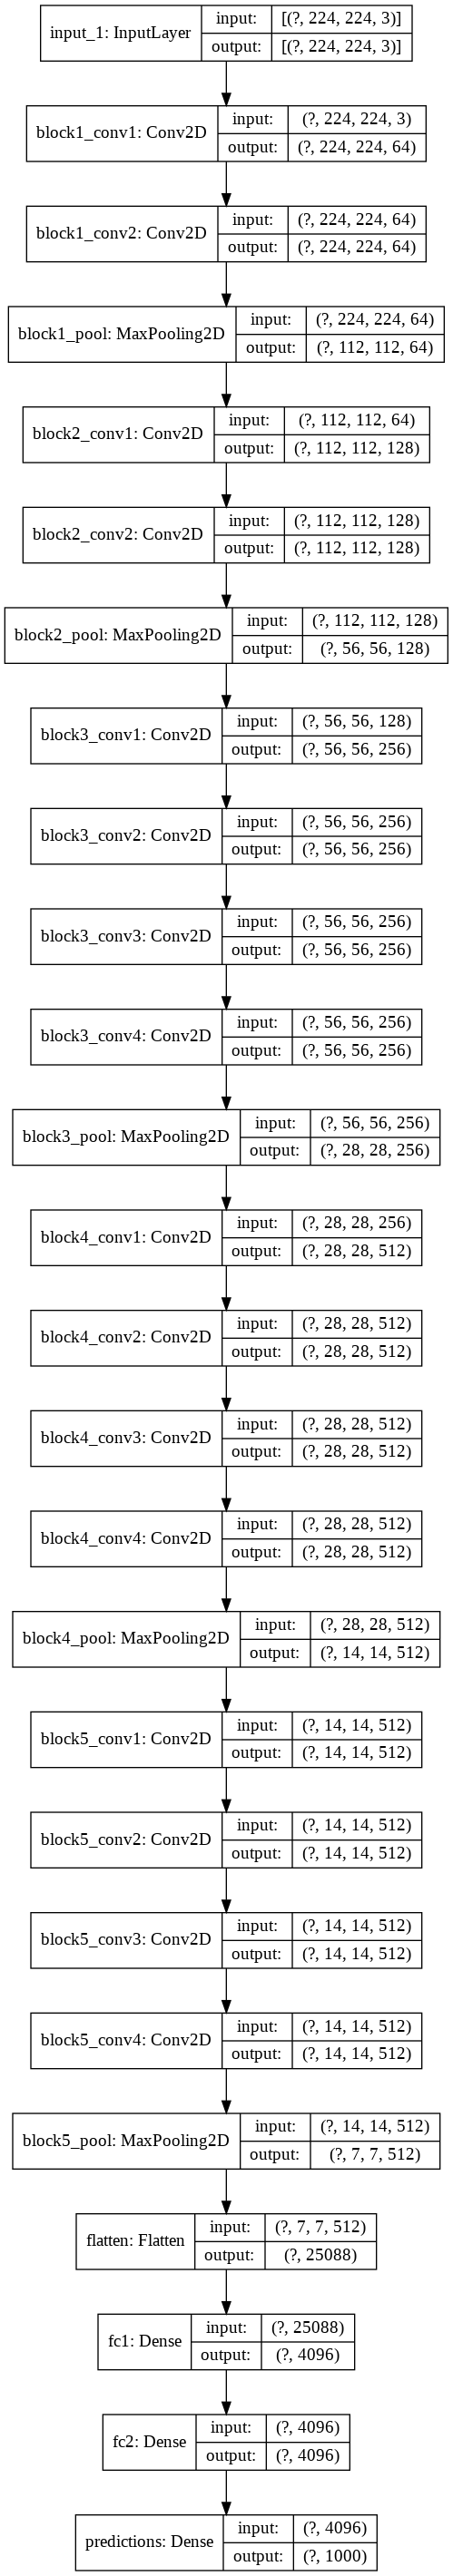

In [67]:
# Plot the model

plot_model(model = features, 
           to_file="layers_output.png", 
           show_shapes=True, 
           show_layer_names=True)

In [68]:
# Test the model on a random input

res = features.predict(np.random.normal(size=(1, 224, 224, 3)).astype(dtype=np.float32))

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

In [69]:
gdd.download_file_from_google_drive(file_id='1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L',
                                    dest_path='/content/cool_cat.jpg',
                                    unzip=False)

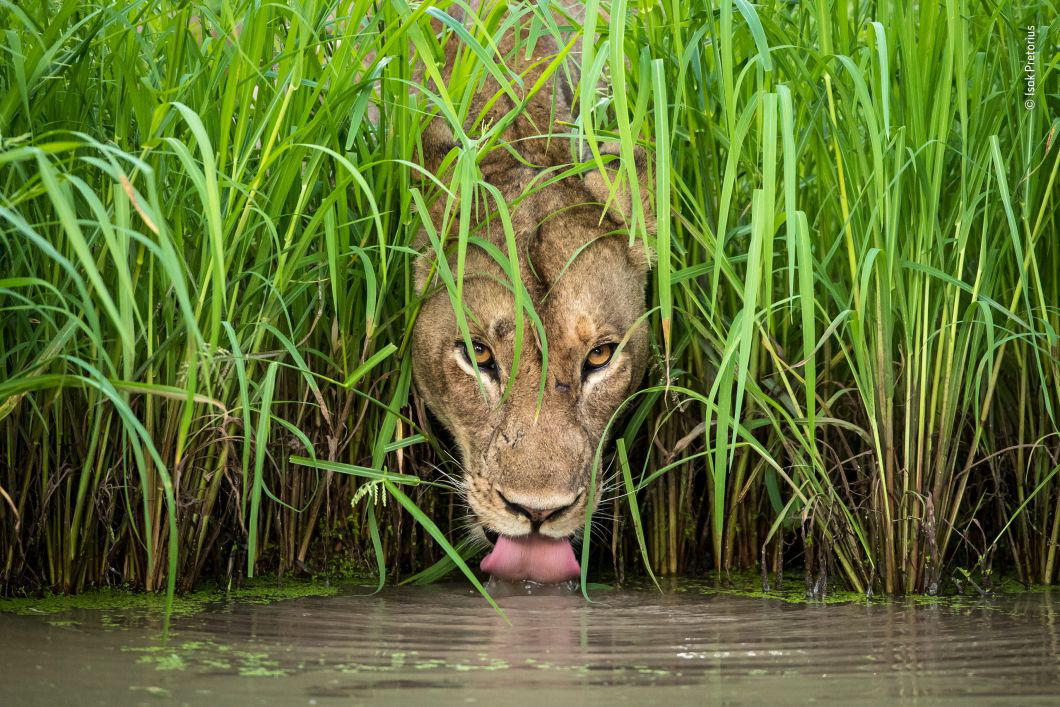

In [70]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('/content/cool_cat.jpg'))

#### Visualise network features from the input image

In [71]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = '/content/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [72]:
# Extract the features

extracted_features = features.predict(x)

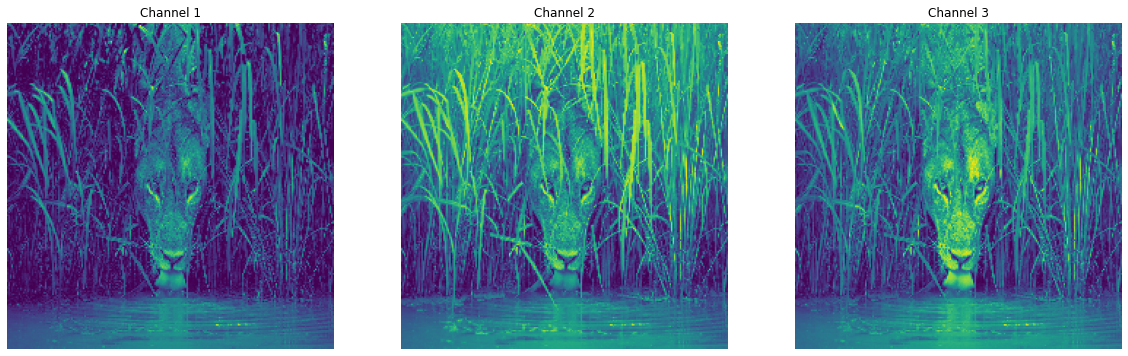

In [73]:
# Visualise the input channels

plt.rcParams["figure.figsize"] = 20, 6

f1 = extracted_features[0].squeeze()

for idx in range(1, 4):
  plt.subplot(1, 3, idx)
  plt.imshow(f1[:,:,idx-1])
  plt.title("Channel {}".format(idx))
  plt.axis("off")

plt.show()

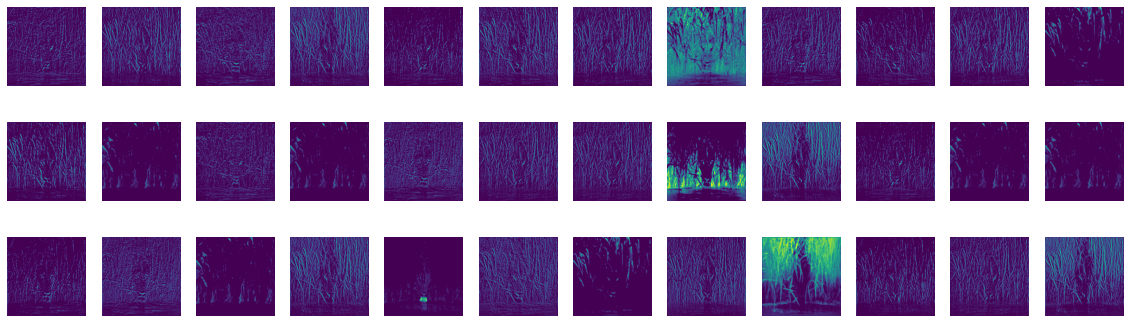

In [74]:
# Visualise some features in the first hidden layer

plt.rcParams["figure.figsize"] = 20, 6

f2 = extracted_features[1].squeeze()

for idx in range(1, 37):
  plt.subplot(3, 12, idx)
  plt.imshow(f2[:,:,np.random.randint(0, 64)])
  plt.axis("off")

plt.show()

In [75]:
# Build a model to extract features by layer name

extracted_features_block3_pool = Model(inputs = vgg_input, outputs=vgg_model.get_layer("block3_pool").output)
b1_p1feature = extracted_features_block3_pool.predict(x)

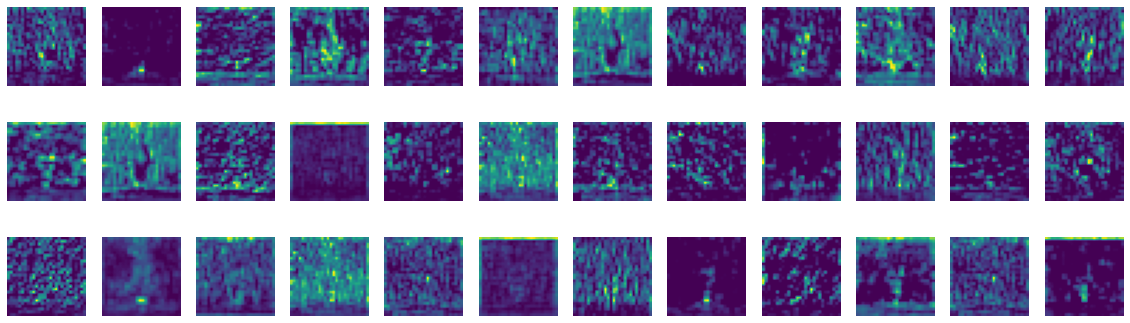

In [76]:
# Visualise some features from the extracted layer output

plt.rcParams["figure.figsize"] = 20, 6

f3 = b1_p1feature.squeeze()

for idx in range(1, 37):
  plt.subplot(3, 12, idx)
  plt.imshow(f3[:,:,np.random.randint(0, 256)])
  plt.axis("off")

plt.show()

In [77]:
# Extract features from a layer deeper in the network

extracted_features_block4_pool = Model(inputs = vgg_input, outputs=vgg_model.get_layer("block4_pool").output)
b4_p1feature = extracted_features_block4_pool.predict(x)

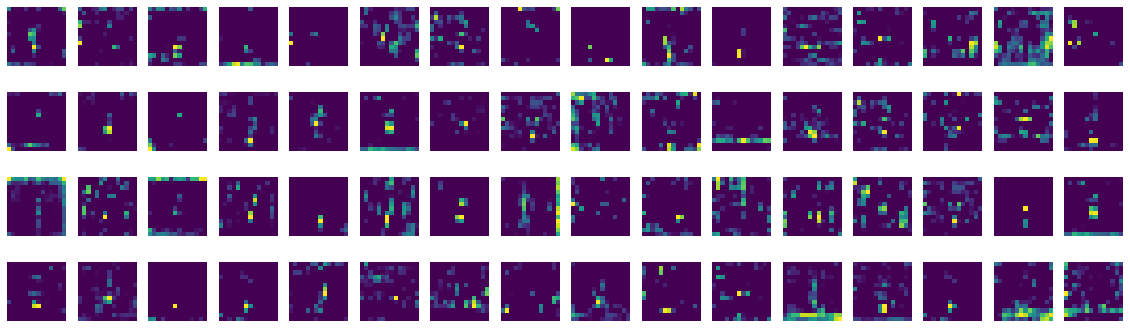

In [78]:
# Visualise some features from the extracted layer output

plt.rcParams["figure.figsize"] = 20, 6

f4 = b4_p1feature.squeeze()

for idx in range(1, 65):
  plt.subplot(4, 16, idx)
  plt.imshow(f4[:,:,np.random.randint(0, 512)])
  plt.axis("off")

plt.show()

In [79]:
# Extract features from a Deepest Convolution Layer in the network

extracted_features_block5_pool = Model(inputs = vgg_input, outputs=vgg_model.get_layer("block5_pool").output)
b5_p1feature = extracted_features_block5_pool.predict(x)

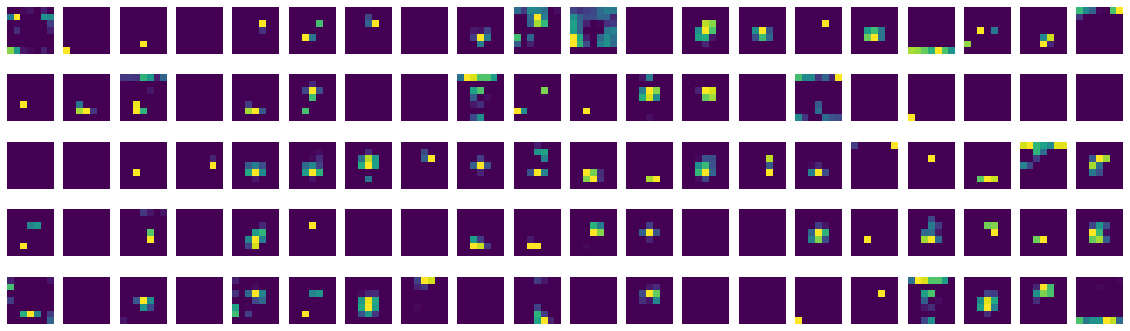

In [80]:
plt.rcParams["figure.figsize"] = 20, 6

f5 = b5_p1feature.squeeze()

for idx in range(1, 101):
  plt.subplot(5, 20, idx)
  plt.imshow(f5[:,:,np.random.randint(0, 512)])
  plt.axis("off")

plt.show()

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [82]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [83]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [84]:
get_weights = lambda model: [layer.weights[0].numpy() for layer in model.layers]
get_bias = lambda model: [layer.weights[1].numpy() for layer in model.layers]

def plot_matrix(old_weights, new_weights, old_biases, new_biases):
    assert len(old_weights) == len(new_weights)
    assert len(old_biases) == len(new_biases)
    assert len(old_weights) == len(old_biases)

    length = len(old_weights)
    fig, axes = plt.subplots(nrows=2, ncols=length, figsize=(12,8))

    for n in range(length):
        delta_l = new_weights[n] - old_weights[n]
        delta_2 = new_biases[n] - old_biases[n]
        # Weight Matrix
        im = axes.flatten()[n].imshow(delta_l)
        axes.flatten()[n].set_title('Layer '+str(n)+' Weight')
        axes.flatten()[n].axis('off')
        fig.colorbar(im, ax=axes.flatten()[n], orientation="horizontal", aspect=20)
        # Bias Vector
        im = axes.flatten()[length+n].imshow(delta_2.reshape((-1, 1)))
        axes.flatten()[length+n].set_title('Layer '+str(n)+' Bias')
        axes.flatten()[length+n].axis('off')
        fig.colorbar(im, ax=axes.flatten()[length+n], orientation="horizontal", aspect=20)

    #fig.colorbar(im, ax=axes.ravel().tolist(), orientation="horizontal", aspect=50)
    fig.suptitle('Weight & Biases matrices variation');

In [85]:
# Retrieve the weights and biases

W0_layer = get_weights(model)
b0_layer = get_bias(model)

In [86]:
# Construct a synthetic dataset

x_train = np.random.random((500, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [87]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=200, verbose=False);

In [88]:
# Retrieve weights and biases

W1_layer = get_weights(model)
b1_layer = get_bias(model)

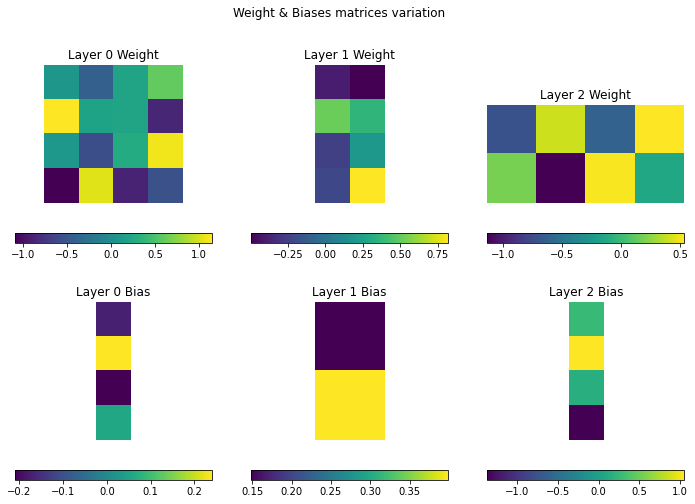

In [89]:
# Plot the variation

plot_matrix(W0_layer, W1_layer, b0_layer, b1_layer)

#### Freeze layers at build time

In [90]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [91]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [92]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [93]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [94]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [95]:
# Retrieve weights and biases

W0_layer = get_weights(model)
b0_layer = get_bias(model)

In [96]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [97]:
# Retrieve weights and biases

W1_layer = get_weights(model)
b1_layer = get_bias(model)

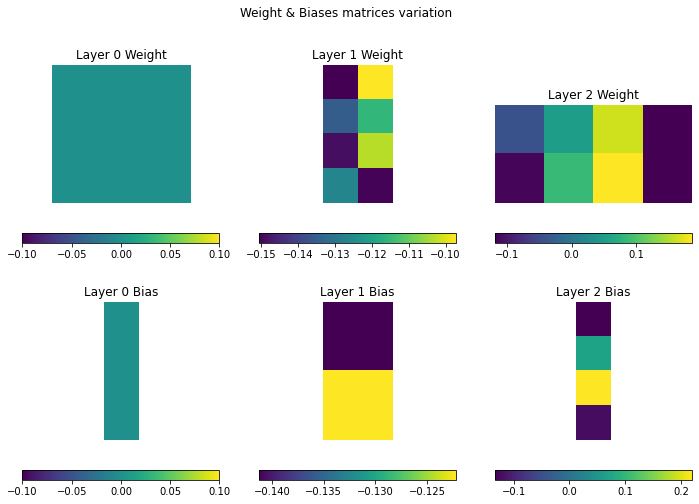

In [98]:
# Plot the variation

plot_matrix(W0_layer, W1_layer, b0_layer, b1_layer)

#### Freeze layers of a pre-built model

In [99]:
# Retrieve weights and biases

W0_layer = get_weights(model)
b0_layer = get_bias(model)

In [100]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [101]:
# Freeze the second layer

model.layers[1].trainable = False

In [102]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [103]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [104]:
# Retrieve weights and biases

W1_layer = get_weights(model)
b1_layer = get_bias(model)

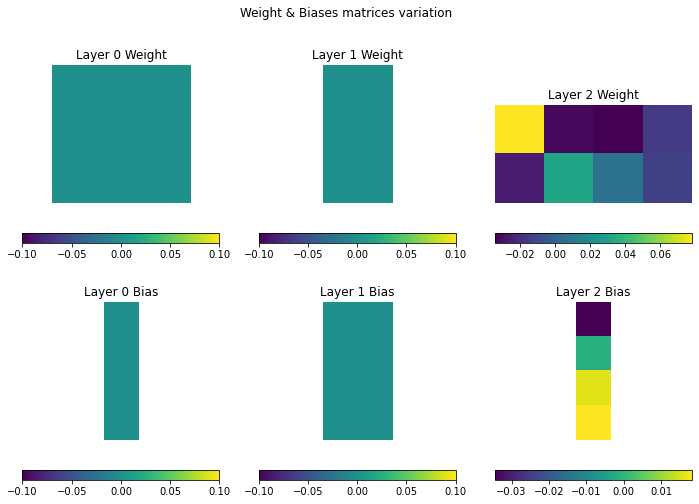

In [105]:
# Plot the variation

plot_matrix(W0_layer, W1_layer, b0_layer, b1_layer)